<div style="border:solid green 2px; padding: 20px">
Станислав, привет и хорошего дня! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать. 

Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### Основные шаги:
- Загрузите данные, путь к файлу:  /datasets/autos.csv.
- Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
- Подготовьте выборки для обучения моделей.
- Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
- Проанализируйте время обучения, время предсказания и качество моделей.
- Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

In [1]:
# !pip install lightgbm
# !pip install catboost

In [2]:
#Код ревьюера
from sklearn.experimental import enable_hist_gradient_boosting

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Стоит предусмотреть обновление/работоспособность библиотек. Пожалуйста, прогоняй код на стороне сервера перед отправкой работы </div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сергей,  Привет! В первый раз я выполняю код локально и потом отправляю на ревью, после уже правлю в хабе. Подскажи пожалуйста как  перед отправкой можно глянуть в хабе? </div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Если, честно, не знаю( Задай вопрос куратору, это не критичная ошибка, но всегда стоит проверять версии библиотек на платформах, думаю разберешься в будущем как прописывать конфиги</div>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from  sklearn.linear_model import  SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

import lightgbm as lgb
from catboost import CatBoostRegressor

## Подготовка данных

In [4]:
#напишем функцию для обзора данных
def data_info(dataset):
    cols = dataset.columns
    colours = ['#000099', '#ffff00'] 
    sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))
    print('')
    print('Shape:')
    display(dataset.shape)
    print('')
    print('Head:')
    display(dataset.head())
    print('')
    print('Corr:')
    display(dataset.corr())
    df_plot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)      
    plt.show()
    print('')
    print('Describe:')
    print('')
    display(dataset.describe())  
    print('Info:')
    print('')
    display(dataset.info())   
    print('Duplicated:')
    #print('')
    display(dataset[dataset.duplicated ()])
    #Процентный список пропущенных данных
    print('isna:')
    print('')
    for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

In [5]:
data = pd.read_csv('/datasets/autos.csv')

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Ок, данные на базе </div>


Shape:


(354369, 16)


Head:


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21



Corr:


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


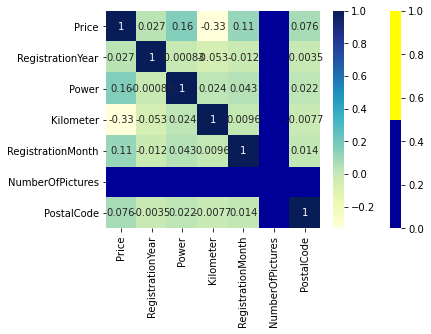


Describe:



,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), 

None

Duplicated:


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


isna:

DateCrawled - 0%
Price - 0%
VehicleType - 11%
RegistrationYear - 0%
Gearbox - 6%
Power - 0%
Model - 6%
Kilometer - 0%
RegistrationMonth - 0%
FuelType - 9%
Brand - 0%
Repaired - 20%
DateCreated - 0%
NumberOfPictures - 0%
PostalCode - 0%
LastSeen - 0%


In [6]:
data_info(data)

In [7]:
data[data.Price == 0]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
111,2016-03-19 18:40:12,0,NaN,2017,manual,0,golf,5000,12,petrol,volkswagen,NaN,2016-03-19 00:00:00,0,21698,2016-04-01 08:47:05
115,2016-03-20 18:53:27,0,small,1999,NaN,0,NaN,5000,0,petrol,volkswagen,NaN,2016-03-20 00:00:00,0,37520,2016-04-07 02:45:22
152,2016-03-11 18:55:53,0,bus,2004,manual,101,meriva,150000,10,lpg,opel,yes,2016-03-11 00:00:00,0,27432,2016-03-12 23:47:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354205,2016-03-09 15:56:30,0,NaN,2000,manual,65,corsa,150000,0,NaN,opel,yes,2016-03-09 00:00:00,0,23758,2016-03-30 11:16:08
354238,2016-03-20 14:55:07,0,small,2002,manual,60,fiesta,150000,3,petrol,ford,NaN,2016-03-20 00:00:00,0,33659,2016-04-06 18:45:23
354248,2016-03-24 13:48:05,0,small,1999,manual,53,swift,150000,3,petrol,suzuki,NaN,2016-03-24 00:00:00,0,42329,2016-04-07 05:17:24
354277,2016-03-10 22:55:50,0,small,1999,manual,37,arosa,150000,7,petrol,seat,yes,2016-03-10 00:00:00,0,22559,2016-03-12 23:46:32


In [8]:
data[data.Power == 0]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15 00:00:00,0,44145,2016-03-17 18:17:43
37,2016-03-28 17:50:15,1500,NaN,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,2016-03-28 00:00:00,0,46483,2016-03-30 09:18:02
40,2016-03-26 22:06:17,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354338,2016-03-31 19:52:33,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04
354346,2016-03-07 17:06:35,2600,NaN,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,61169,2016-03-08 21:28:38
354363,2016-03-27 20:36:20,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49


In [9]:
data[data.Repaired.isna() == True]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06
12,2016-03-15 22:49:09,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,NaN,2016-03-15 00:00:00,0,37269,2016-04-01 13:16:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354349,2016-03-16 17:06:19,5999,wagon,2005,manual,140,a4,150000,4,gasoline,audi,NaN,2016-03-16 00:00:00,0,56472,2016-03-18 11:30:17
354356,2016-04-04 11:45:16,999,convertible,2000,manual,95,megane,150000,4,petrol,renault,NaN,2016-04-04 00:00:00,0,88477,2016-04-06 12:44:52
354357,2016-03-09 11:36:55,1690,wagon,2004,manual,55,fabia,150000,4,petrol,skoda,NaN,2016-03-09 00:00:00,0,18246,2016-04-04 08:15:30
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52


In [10]:
data[(data.VehicleType.isna() == True) & (data.Model.isna() == True) & (data.Power == 0)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
260,2016-04-04 09:49:59,450,NaN,2016,manual,0,NaN,150000,3,petrol,mitsubishi,no,2016-04-04 00:00:00,0,59302,2016-04-06 11:17:11
306,2016-03-21 14:38:37,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-21 00:00:00,0,6493,2016-03-24 02:47:34
443,2016-03-24 16:46:05,1950,NaN,2017,manual,0,NaN,150000,7,petrol,volkswagen,no,2016-03-24 00:00:00,0,70376,2016-03-30 18:16:07
478,2016-03-24 17:49:19,0,NaN,2000,manual,0,NaN,150000,0,NaN,audi,yes,2016-03-24 00:00:00,0,72514,2016-03-29 03:45:06
522,2016-03-14 18:40:14,0,NaN,2000,NaN,0,NaN,150000,0,NaN,volvo,NaN,2016-03-14 00:00:00,0,25524,2016-03-14 18:40:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354073,2016-03-19 14:53:26,1750,NaN,1995,NaN,0,NaN,100000,12,NaN,sonstige_autos,NaN,2016-03-19 00:00:00,0,6188,2016-04-01 01:47:17
354083,2016-03-30 07:54:17,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,NaN,2016-03-30 00:00:00,0,6686,2016-04-06 23:46:19
354162,2016-03-07 19:51:14,1500,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-07 00:00:00,0,26789,2016-04-03 11:46:59
354338,2016-03-31 19:52:33,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04


In [11]:
data[data['RegistrationYear'] > 2016]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
22,2016-03-23 14:52:51,2900,NaN,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23 00:00:00,0,49716,2016-03-31 01:16:33
26,2016-03-10 19:38:18,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10 00:00:00,0,31139,2016-03-16 09:16:46
48,2016-03-25 14:40:12,7750,NaN,2017,manual,80,golf,100000,1,petrol,volkswagen,NaN,2016-03-25 00:00:00,0,48499,2016-03-31 21:47:44
51,2016-03-07 18:57:08,2000,NaN,2017,manual,90,punto,150000,11,gasoline,fiat,yes,2016-03-07 00:00:00,0,66115,2016-03-07 18:57:08
57,2016-03-10 20:53:19,2399,NaN,2018,manual,64,other,125000,3,NaN,seat,no,2016-03-10 00:00:00,0,33397,2016-03-25 10:17:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354112,2016-03-11 15:49:51,3600,NaN,2017,manual,86,transit,150000,5,gasoline,ford,NaN,2016-03-11 00:00:00,0,32339,2016-03-12 05:45:02
354140,2016-03-29 16:47:29,1000,NaN,2017,manual,101,a4,150000,9,NaN,audi,NaN,2016-03-29 00:00:00,0,38315,2016-04-06 02:44:27
354203,2016-03-17 00:56:26,2140,NaN,2018,manual,80,fiesta,150000,6,NaN,ford,no,2016-03-17 00:00:00,0,44866,2016-03-29 15:45:04
354253,2016-03-25 09:37:59,1250,NaN,2018,NaN,0,corsa,150000,0,petrol,opel,NaN,2016-03-25 00:00:00,0,45527,2016-04-06 07:46:13


count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64

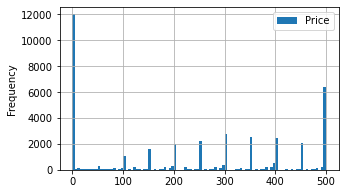

In [12]:
data.plot(y = 'Price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['Price'].describe()



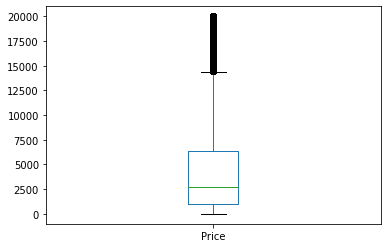

In [13]:
_, bp = data['Price'].plot.box(return_type='both')

count    354369.000000
mean        110.094337
std         189.850405
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

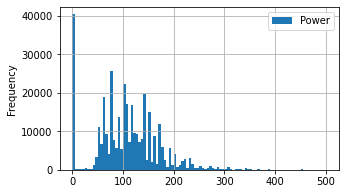

In [14]:
data.plot(y = 'Power', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['Power'].describe()

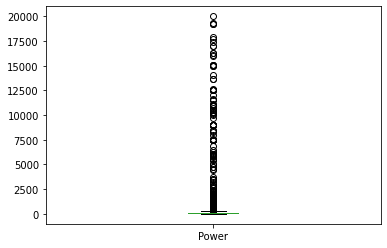

In [15]:
_, bp = data['Power'].plot.box(return_type='both')

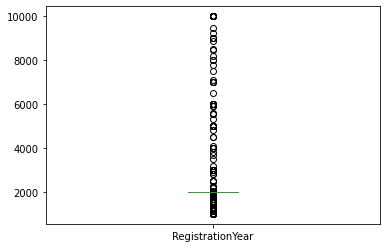

In [16]:
_, bp = data['RegistrationYear'].plot.box(return_type='both')

#### Результат анализа данных
- Датасет большой, 16 столбцов и 354369 строк, состояние датасета очень плохое, дубликаты,  пустые значения, ненужные столбцы, в реальной ситуации я бы попросил предоставить выборку без пропусков
- Корреляции на которую стоит обратить внимание не обнаружено
- Столбец **NumberOfPictures** содержит только значения 0, удалим
- Обнаружены дубликаты, удалим
- Столбец **PostalCode** для нас неинфрмативен, удалим
- **DateCrawled**, **DateCreated**, **LastSeen**, **RegistrationMonth** удалим
- Все некатегориальные значения преобразуем
- Пустые значения в столбце **Repaired** закодируем
- **Price** до 1000 выбросы, удалим
- **Power** все что меньше 50 заполним средними значениями
- Строки где нет типа авто, модели и мощности  нерелевантны, т.к. невозможно понять что перед нами, удалим  
- Пустые **Gearbox** удалим
- Обнаружены "машины из будущего" с годом  регистрации позже даты выгрузки из базы, если  установить таким среднее значение, у  нас все данные могут "поехать", удалим. 
- **RegistrationYear** старше 1980 удалим т.к. это выбросы
- **FuelType** пустой поменяем на **other**
- Пустой **Repaired** заменим на 0

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Какой-либо корреляции не увидел, там же около нуля. Так же корреляцию лучше смотреть после обработки пропусков, выбросов и тд </div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Поправил </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

In [17]:
#Подготовка данных. 
data = data[(data.VehicleType.isna() == False) & (data.Model.isna() == False) & (data.Brand.isna() == False)]
data = data[data.Gearbox.isna() == False]
data.FuelType[data.FuelType.isna() == True] = 'other'
data = data[data.Price >=  1000]
data = data.drop('NumberOfPictures', axis = 1) 
data = data.drop('PostalCode', axis = 1) 
data = data.drop('DateCrawled', axis = 1) 
data = data.drop('DateCreated', axis = 1) 
data = data.drop('LastSeen', axis = 1) 
data = data.drop('RegistrationMonth', axis = 1) 
data = data.drop_duplicates()
data = data[data['RegistrationYear'] <= 2016]
data = data[data['RegistrationYear'] > 1980]
#data.Power[data.Power == 0] = data.Power.mean()
data.Power[data.Power < 50] = data.Power.mean()
data = data[data.Power <=  476]
data.Repaired[data.Repaired.isna() == True] = 0

<div class="alert alert-danger">
<b>Комментарий ревьюера V2 : &#10060; </b> 2016 год не стоит исключать из выборки, т.к. это год выгрузки из бд</div>

<div class="alert alert-info">
<b>Комментарий студента V2:</b> Включил 2016 в выборку </div>

In [18]:
display(data.shape)
data.head()

(202941, 10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
2,9800,suv,2004,auto,163.0,grand,125000,gasoline,jeep,0
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no
6,2200,convertible,2004,manual,109.0,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125.0,c_max,30000,petrol,ford,0


In [19]:
data.dtypes

Price                 int64
VehicleType          object
RegistrationYear      int64
Gearbox              object
Power               float64
Model                object
Kilometer             int64
FuelType             object
Brand                object
Repaired             object
dtype: object

In [20]:
data.VehicleType = data.VehicleType.astype(str)
data.Gearbox = data.Gearbox.astype(str)
data.Model = data.Model.astype(str)
data.FuelType = data.FuelType.astype(str)
data.Brand = data.Brand.astype(str)
data.Repaired = data.Repaired.astype(str)

In [21]:
data[data.Power > 476]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired


In [22]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,202941.000000,202941.000000,202941.000000,202941.000000
mean,5887.336359,2003.971578,129.880006,124959.421704
std,4620.068642,5.414176,51.790509,38262.924596
min,1000.000000,1981.000000,50.000000,5000.000000
25%,2250.000000,2001.000000,95.000000,100000.000000
50%,4300.000000,2004.000000,125.000000,150000.000000
75%,8250.000000,2008.000000,150.000000,150000.000000
max,20000.000000,2016.000000,476.000000,150000.000000


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Обрати, пожалуйста, внимание, что год регистрации авто не может быть позже даты выгрузки из бд. Так же остались подозрительно низкие цены, выбросы в power. Так же в категориальных признаках есть значения 'other',зачем вводить новую категорию? Так же из категориальных данных делать численные просто заменяя значения на числа не корректно. Давай будем использовать кодирование, а не велосипеды. Помимо этого кодирование и масштабирование признаков производится только после разбиения на трейн и тест </div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Поправил обработку данных,  кодирование отправил вниз  </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Обрати, пожалуйста, внимание на столбец power, даже у суперкаров движки меньше 1000 л.с., в интернете много информации по этому поводу(да и суперкары тоже можно исключить, в выборке среднячок) </div>

<div class="alert alert-info">
<b>Комментарий студента V2:</b> Спасибо :) поправил </div>

## Обучение моделей

#### Подготовим выборки для обучения моделей.

In [35]:
feature = data.drop(['Price'], axis = 1)
target = data.Price

#Откусим кусочек для финального тестирования:
feature, feature_test, target, target_test = train_test_split(
    feature, target, test_size=0.10, random_state=12345)

feature_train, feature_valid, target_train, target_valid = train_test_split(feature, target,  
                                                                            test_size=0.20, random_state=12345)


#Кодируем
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(feature_train)

feature_train = encoder.transform(feature_train)
feature_test =  encoder.transform(feature_test)
feature_valid = encoder.transform(feature_valid)

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Обрати, пожалуйста, внимание, что кодирование и масштабирование выборок необходимо производить после </div>
<div class="alert alert-info">
<b>Комментарий студента V2:</b> Понял тебя, для избежания утечки, кодируем после разбиения </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b> Не совсем так, в трейне и тесте может быть разное кол-во категорий, поэтому на трейне мы обучаем и трансформируем выборку(fit_transform),на остальных трансформируем(transform) </div>

<div class="alert alert-info">
<b>Комментарий студента V3:</b> Так, теперь понял, поправил :) </div>


## Анализ моделей

#### Обучим разные модели

#### CatBoostRegressor

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь стоит добавить подбор гиперпараметров с кроссвалидацией, советую использовать GridSearchCV / RandomizedSearchCV</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Добавил гридсерч </div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Отлично, извини, что влепил красный, здесь он не требуется, но ты молодец </div>

In [ ]:
%%time

clf = CatBoostRegressor()


parametrs = { 'iterations': [1, 50, 100],
              'learning_rate': [0.1,0.2],
              'depth': [1,2]}

#clf.get_params().keys()

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(feature_train, target_train)
grid.best_params_

In [ ]:
%%time
model = CatBoostRegressor(iterations=100, learning_rate=0.2, depth=2)
# Fit model
model.fit(feature_train, target_train)
# Get predictions
predictions = model.predict(feature_valid)

round(mean_squared_error(target_valid, predictions, squared=False), 2)

- Отлично, катбуст с текущими параметрами  проходит по условию "Значение метрики RMSE должно быть меньше 2500"

#### HistGradientBoostingRegressor

In [ ]:
'''
%%time

clf = HistGradientBoostingRegressor()

parametrs = { 'max_iter': [1, 50, 100],
              'learning_rate': [0.1,0.2],
              'max_depth': [1,2]}


clf.get_params().keys()

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(feature_train, target_train)
grid.best_params_
'''

- CPU times: user 17min 33s, sys: 11.3 s, total: 17min 44s
- Wall time: 17min 52s
- {'learning_rate': 0.2, 'max_depth': 2, 'max_iter': 100}

In [ ]:
%%time
model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.2, max_depth=2)
# Fit model
model.fit(feature_train, target_train)
# Get predictions
predictions = model.predict(feature_valid)

round(mean_squared_error(target_valid, predictions, squared=False), 2)



- Яндекс, не в обиду но HistGradientBoostingRegressor от склерн выигрывает с теми же параметрами по метрике RMSE :)

#### SGDRegressor

In [ ]:
%%time

clf = SGDRegressor()

parametrs = { 'max_iter': [10, 50,100],
              'learning_rate': ['invscaling']
            }



#clf.get_params().keys()

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(feature_train, target_train)
grid.best_params_

In [ ]:

%%time
model = SGDRegressor(max_iter=100, learning_rate='invscaling', early_stopping=True)
# Fit model
model.fit(feature_train, target_train)
# Get predictions
predictions = model.predict(feature_valid)

round(mean_squared_error(target_valid, predictions, squared=False), 2)


#### LightGBM

In [ ]:
%%time

lgb_model = lgb.LGBMRegressor(
    categorical_feature= [0,2,3,4,8,9,10],
    task = 'predict',
    application = 'regression',
    objective = 'root_mean_squared_error',
    boosting_type="gbdt",
    num_iterations = 100,
    learning_rate = 0.05,
    num_leaves=15,
    tree_learner='feature',
    max_depth =10,
    min_data_in_leaf=7,
    bagging_fraction = 1,
    bagging_freq = 100,
    reg_sqrt='True',
    metric ='rmse',
    feature_fraction = 0.6)

lgb_model.fit(feature_train, target_train) 

predictions = lgb_model.predict(feature_valid)
print(round(mean_squared_error(target_valid, predictions, squared=False), 2))

In [ ]:
%%time
parameters = {
    'task' : ['predict'],
    'boosting': ['gbdt' ],
    'objective': ['root_mean_squared_error'],
    'num_iterations': [  10, 50, 100  ],
    'learning_rate':[  0.05, 0.005 ],
   'max_depth' :[ 10,15,25] 
}

gsearch_lgb = GridSearchCV(lgb_model, param_grid = parameters, n_jobs=6, verbose=10)
gsearch_lgb.fit(feature_train, target_train)

print(grid.best_params_)
print(round(mean_squared_error(target_valid, predictions, squared=False), 2))

In [ ]:
gsearch_lgb.best_params_

#### Победитель удостаивается  чести обучиться на тестовой выборке

In [ ]:
%%time

lgb_model = lgb.LGBMRegressor(
    categorical_feature= [0,2,3,4,8,9,10],
    task = 'predict',
    application = 'regression',
    objective = 'root_mean_squared_error',
    boosting_type="gbdt",
    num_iterations = 100,
    learning_rate = 0.05,
    num_leaves=15,
    tree_learner='feature',
    max_depth =15,
    min_data_in_leaf=7,
    bagging_fraction = 1,
    bagging_freq = 100,
    reg_sqrt='True',
    metric ='rmse',
    feature_fraction = 0.6)

lgb_model.fit(feature_test, target_test) 

predictions = lgb_model.predict(feature_valid)
print(round(mean_squared_error(target_valid, predictions, squared=False), 2))

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Молодец, что тестируешь только итоговую модель! </div>

#### Проанализируем время обучения, время предсказания и качество моделей.

##### Точность
- На первом месте у нас **LightGBM** с показателем **RMSE** 1803.65 на тестовой выборке показал точность 1926.76

- Второе место  получает **HistGradientBoostingRegressor** с показателем **RMSE** 1972.89

- Дышит в спину бустер  **CatBoostRegressor** с показателем **RMSE** 2006.84
- Ну и четверное место занимает **SGDRegressor**  с показателем **RMSE** 5178084920802.75

##### Скорость обучения
- По скорости обучения моделей, первое место у **SGDRegressor**
- Катбуст чуть медленней
- **LightGBM** Медленней всех

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей

<b>Итоговый комментарий ревьюера:</b> Молодец, хорошая работа, похвально, что пытаешься все автоматизировать, но есть пара критических моментов, которые необходимо исправить, а именно:
1. Выбросы
2. Кодирование выборки
3. Корреляция
4. Кроссвалидация и подбор гиперпараметров<br>
Так же советую для лучшего восприятия добавить графиков, ниже оставляю пару ссылок для самообучения!


<b>Итоговый комментарий ревьюера V2:</b> Молодец, обрати внимание на следущее:
1. столбец power
2. 2016 год
3. Кодирование и масштабирование после разбиения на трейн и тест<a href = "https://machinelearningmastery.com/data-preparation-without-data-leakage/">How to Avoid Data Leakage</a><br>
Насчет последнего советую внимательно почитать про утечки в данных, чтобы получать адекватные модели

<b>Итоговый комментарий ревьюера V3:</b> Молодец, все супер, давай только немного подправим кодирование и работа будет зачтена!

<b>Итоговый комментарий ревьюера V4:</b> Отлично, все критические замечания учтены, работа зачтена! Успехов в дальнейшем обучении!

<div class="alert alert-success">
<b>Рубрика “Полезные ссылки”:
✅</b> <br>
<a href = "https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html">Коэффициенты корреляции</a><br>
<a href = "https://www.researchgate.net/profile/Paul-Louangrath/post/Ranking_or_scoring_variables_using_conditional_probability/attachment/59d63c45c49f478072ea7c1a/AS%3A273748962283533%401442278246675/download/100+Statistical+Tests.pdf">100 Statistical tests</a><br>
<a href = "https://loginom.ru/blog/missing">Обработка пропусков</a><br>
<a href = "https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo"> Seaborn</a><br>
<a href = "https://habr.com/ru/post/502958/"> Plotly</a><br>
<a href = "https://medium.com/@jetbootsmaker/%D0%BF%D0%BE%D0%B2%D1%8B%D1%88%D0%B0%D0%B5%D0%BC-%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C-%D0%BF%D1%80%D0%B8-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B5-%D1%81-jupyter-notebook-81a1cab8bac1"> Повышаем продуктивность при работе с Jupyter</a><br>
<a href = "https://towardsdatascience.com/5-things-you-should-know-about-covariance-26b12a0516f1">5 Things You Should Know About Covariance</a><br>
    <a href = "https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/">Выбросы</a><br>
    <a href = "https://www.kaggle.com/code/baghern/a-deep-dive-into-sklearn-pipelines/notebook">Pipeline</a>
</div>